In [25]:
import numpy as np # Númerica
import matplotlib.pyplot as plt # Gráficas
from scipy.interpolate import CubicSpline, lagrange, interp1d # Interpolación
from scipy.integrate import quad, dblquad, tplquad, trapezoid, simpson # Integración
import sympy as sp # Símbolos

# ⚠ Importante

👁 Puede usar unicamente las librerias vistas en clase (estas están en la parte superior) en caso de agregar una nueva, debe justificarla.

💀 No está permitido el uso de IA's en caso de hacerlo su parcial será **anulado**!

❗ Comente su código y funciones, esto hace parte de la nota.

✅ Responda ordenadamente y con claridad.


## Nombre: Mathew Stev Hernandez Marin

# 1

**(30 puntos)** Sea la función $f(x) = 3^x$,

---

a. Defina una función llamada derivada (ver abajo) que encuentre el valor de la derivada en $x=2$ usando diferencias finitas centrales,

$$
f'(x) ≈ \frac{f(x+h) - f(x-h)}{2h}
$$

con una tolerancia menor a $10^{-8}$ y que retorne el valor de $f'(x=2)$ para cada valor de $h$. Tome con $h$ inicial 0.1.

---

b. Realice un gráfico logaritmico del error asociado a $f'(x)$ absoluto en función de $h$, conociendo que

$$
\frac{d}{dx}(b^x) = b^x\ln b
$$





```python
def derivada(f,x, tol = 1e-8):
'''
Recuerde hacer su documentación
'''

  return valor_derivada, h_valores
```



In [47]:
# Aqui va su código
#defino la funcion derivada
def derivada(f,x,tol = 1e-8):
  h = 0.1 #inicion el primer valor de h

  h_valores=[0.1] # creo una lista donde pongo los valores que tomará h y lo hago antes del while para meter todos los valores


  f1 = f(x) #defino una f1 y f2 para poder comenzar con una iteración de un while

  f2 = (f(x+h)-f(x-h))/(2*h)

  derivada_valores= [f2]#defino una lista para guardar las derivadas y pongo el primer valor de f2 dado que en el while empieza a darmelos desde el 2do

  while abs(f1-f2) > tol:#defino un while que me se detendrá en el momento de que el error sea menor que 1e-8


    f1 = f2 # actualizo el valor de f1 a f2

    h *= 0.1 # disminuyo el valor de h partiendolo por diez antes que la definicion de f2 porque si no se cancela

    f2 = (f(x+h)-f(x-h))/(2*h) #defino f2 como la derivada de f

    derivada_valores.append(f2) # agrego un valor nuevo de f2 a la lista

    h_valores.append(h) # agrego un valor nuevo de h a la lista para poder saber los valores que toma h

  return derivada_valores , h_valores
#evalúo la función con llos datos del problema
f = lambda x: 3**x
x=2

derivada_f=derivada(f,x,tol=1e-8)

print(derivada_f)


([9.90741213869141, 9.887709494557216, 9.88751258696574, 9.887510617909708, 9.887510598272083, 9.887510598716172], [0.1, 0.010000000000000002, 0.0010000000000000002, 0.00010000000000000003, 1.0000000000000004e-05, 1.0000000000000004e-06])


In [62]:
def lista_derivadas(f,x,tol = 1e-8):
  h = 0.1
  h_valores=[0.1]
  f1 = f(x)
  f2 = (f(x+h)-f(x-h))/(2*h)
  derivada_valores= [f2]
  while abs(f1-f2) > tol:
    f1 = f2
    h *= 0.1
    f2 = (f(x+h)-f(x-h))/(2*h)
    derivada_valores.append(f2)
    h_valores.append(h)
  return derivada_valores

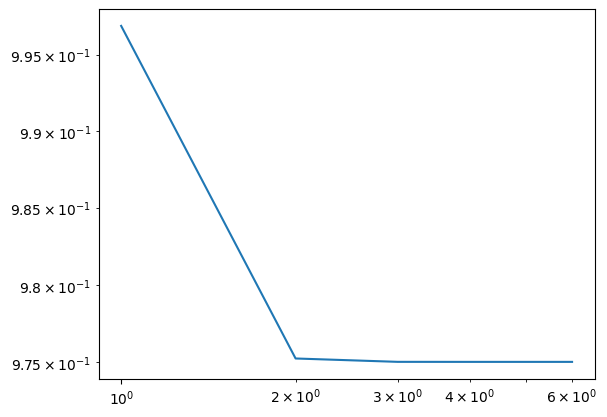

In [97]:
x_valores = np.linspace(1,6,6) # defino los valores de x para el plot


freal =lambda x: 3**2*np.log(3) #defino una funcion exacta lambda en el punto 2 para ver como el error se acerca al valor exacto

derivada= lista_derivadas(f,2,1e-8) # con la funcion anterior reestructurada para darme nada mas la lista de los valores de la derivada hago un nuevo objeto

valoreslog= [] # creo una lista vacia para poner los valores de la derivada real

for x in x_valores:
  valoreslog.append(freal(x))

error = abs(np.array(derivada)-np.array(valoreslog)) # hago una lista de los valores del error restando los valores de las derivadas de la funcion con los valores de la derivada exacta

plt.loglog(x_valores,error) # ploteo  de manera logaritmica los valores de x y como afecta al error

## 2


**(40 puntos)** Considere una barra delgada y homogénea de longitud $L = 1.0\ \text{m}$ que está sometida a una conducción de calor en régimen estacionario. Se ha medido la temperatura a lo largo de la barra en ciertos puntos:

| $x$ (m) | $T(x)$ (°C) |
|--------|--------------|
| 0.0    | 100.0        |
| 0.2    | 92.1         |
| 0.4    | 77.8         |
| 0.6    | 59.3         |
| 0.8    | 35.6         |
| 1.0    | 10.0         |


Con base en estos datos responda:

---

a. Encuentre una expresión para el polinomio interpolador de **Lagrange** para $T(x)$

---

b. Usando la función obtenida por **Lagrange** y haciendo **CubicSpline**, haga un gráfico donde muestre el comportanmiento de las funciones en comparación con los datos experimentales.

---

c. Calcule el **gradiente térmico** $\frac{dT}{dx}$ usando los datos procedentes de interpolación CubicSpline. Use `np.gradient` con $h = 10^{-4}$.

---

d. Determinar el **flujo de calor** $q(x) = -k \frac{dT}{dx}$ con $k = 401\ \text{W/m·K}$ (cobre) y grafique para $x\in [0, 1]$.



       5       4         3         2
195.3 x - 474 x + 419.3 x - 222.3 x - 8.333 x + 100


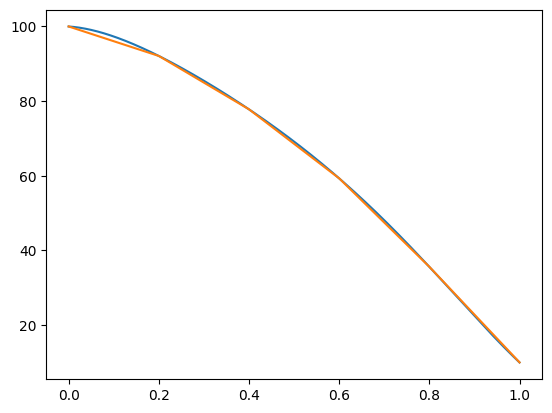

In [103]:
# Aquí va su código
x_numeros= np.linspace(0,1,6)
T_valores= [100,92.1,77.8,59.3,35.6,10]
#a)
#encuentro el polinomio de lagrange
polinomio_lagrange= lagrange(x_numeros,T_valores)
print(polinomio_lagrange)

#b)
# hago una lista con el poliniomio de lagrange para plotearlo
valores_poliniomio=np.linspace(0,1,1000)
y_valores= []
for x in valores_poliniomio:
  polinomio= 195.3*(x**5) - 474* (x**4) + 419.3* (x**3) - 222.3* (x**2) - 8.333* (x) + 100
  y_valores.append(polinomio)

plt.plot(valores_poliniomio,y_valores)

plt.plot(x_numeros,T_valores)

# 3

**(30 puntos)** Consideremos una lámina triangular $R$ con vértices (0,0), (0,3), (3,0) y con densidad  $\rho (x,y) = xy$ [kg/m$^2$]

a. Calcule la masa total del sistema si:

$$
m = \iint_R \rho(x, y)\, dA = \int_0^3\int_0^{3-x} \rho(x,y)\, dydx
$$

Usando una forma iterativa de `quad`, compare su resultado con `dblquad`.


b. Ahora, encuentre el centro de masa de la lámina, si

$$
\bar{x} = \frac{M_y}{m} = \frac{\iint_R x \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}
$$

$$
\bar{y} = \frac{M_x}{m} = \frac{\iint_R y \rho(x, y)\, dA}{\iint_R \rho(x, y)\, dA}.
$$

Puede usar la forma iterativa de `quad` o `dblquad`.

c. Calcule el **momento de inercia respecto al eje \$x\$**, definido como:

$$
I_x = \iint_R y^2\, \rho(x, y)\, dA,
$$





In [ ]:
# Aquí va su código